In [2]:
### install, import, downloads


!pip install mlxtend

import pandas as pd                                             #for dataframe operations
import numpy as np                                              #for array operations

import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
#mlxtend : machine learning extensions

import random
import matplotlib.pyplot as plt                                 ## it shows immediatly after matplot lib if not we have to do plt.show()
%matplotlib inline 


import networkx as nx

from sklearn.neighbors import KNeighborsClassifier              # kNN classifier
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor
from sklearn.model_selection import GridSearchCV                # Grid search with CV
from sklearn.metrics import confusion_matrix,mean_squared_error,adjusted_rand_score,accuracy_score # Error Metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler   # To Scale the data
from sklearn.model_selection import train_test_split, GridSearchCV          # To split the data

from sklearn.cluster import KMeans,AgglomerativeClustering 

from scipy.cluster.hierarchy import linkage, dendrogram

#from imblea import CondensedNearestNeighbour                    # Implementation based on Hart's condensed knn

#### Install surprise package

#!pip install scikit-surprise
#!pip install surprise
#! conda install -c conda-forge scikit-surprise
#from surprise import BaselineOnly

#from surprise import BaselineOnly
#from surprise import Dataset
#from surprise import Reader, KNNWithMeans
#from surprise.model_selection import cross_validate
#from collections import defaultdict
#from itertools import islice

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

!pip install xgboost

from sklearn.svm import SVC

import statsmodels.formula.api as sm                           #logistic regression
from scipy.stats import mode

!pip install graphviz
import graphviz
import seaborn
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn import tree

!pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


import pandas_profiling as pp

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold

ImportError: cannot import name 'factorial'

## Read Data

Read both test data and train data

In [3]:
price_train_dt = pd.read_csv("train.csv",delimiter=",")

In [4]:
price_test_dt = pd.read_csv("test.csv",delimiter=",")

Exploratory Data analysis

In [5]:
price_train_dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [532]:
price_test_dt.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [533]:
price_train_dt.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [534]:
price_test_dt.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


Seperate "y" from the imported train data

In [535]:
y=price_train_dt["SalePrice"]

In [536]:
price_trainx_dt=price_train_dt.copy().drop(["SalePrice"],axis=1)

In [537]:
price_trainx_dt.shape

(1460, 80)

In [538]:
price_test_dt.shape

(1459, 80)

In [539]:
price_trainx_dt.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [540]:
price_test_dt.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object


In [541]:
price_trainx_dt.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


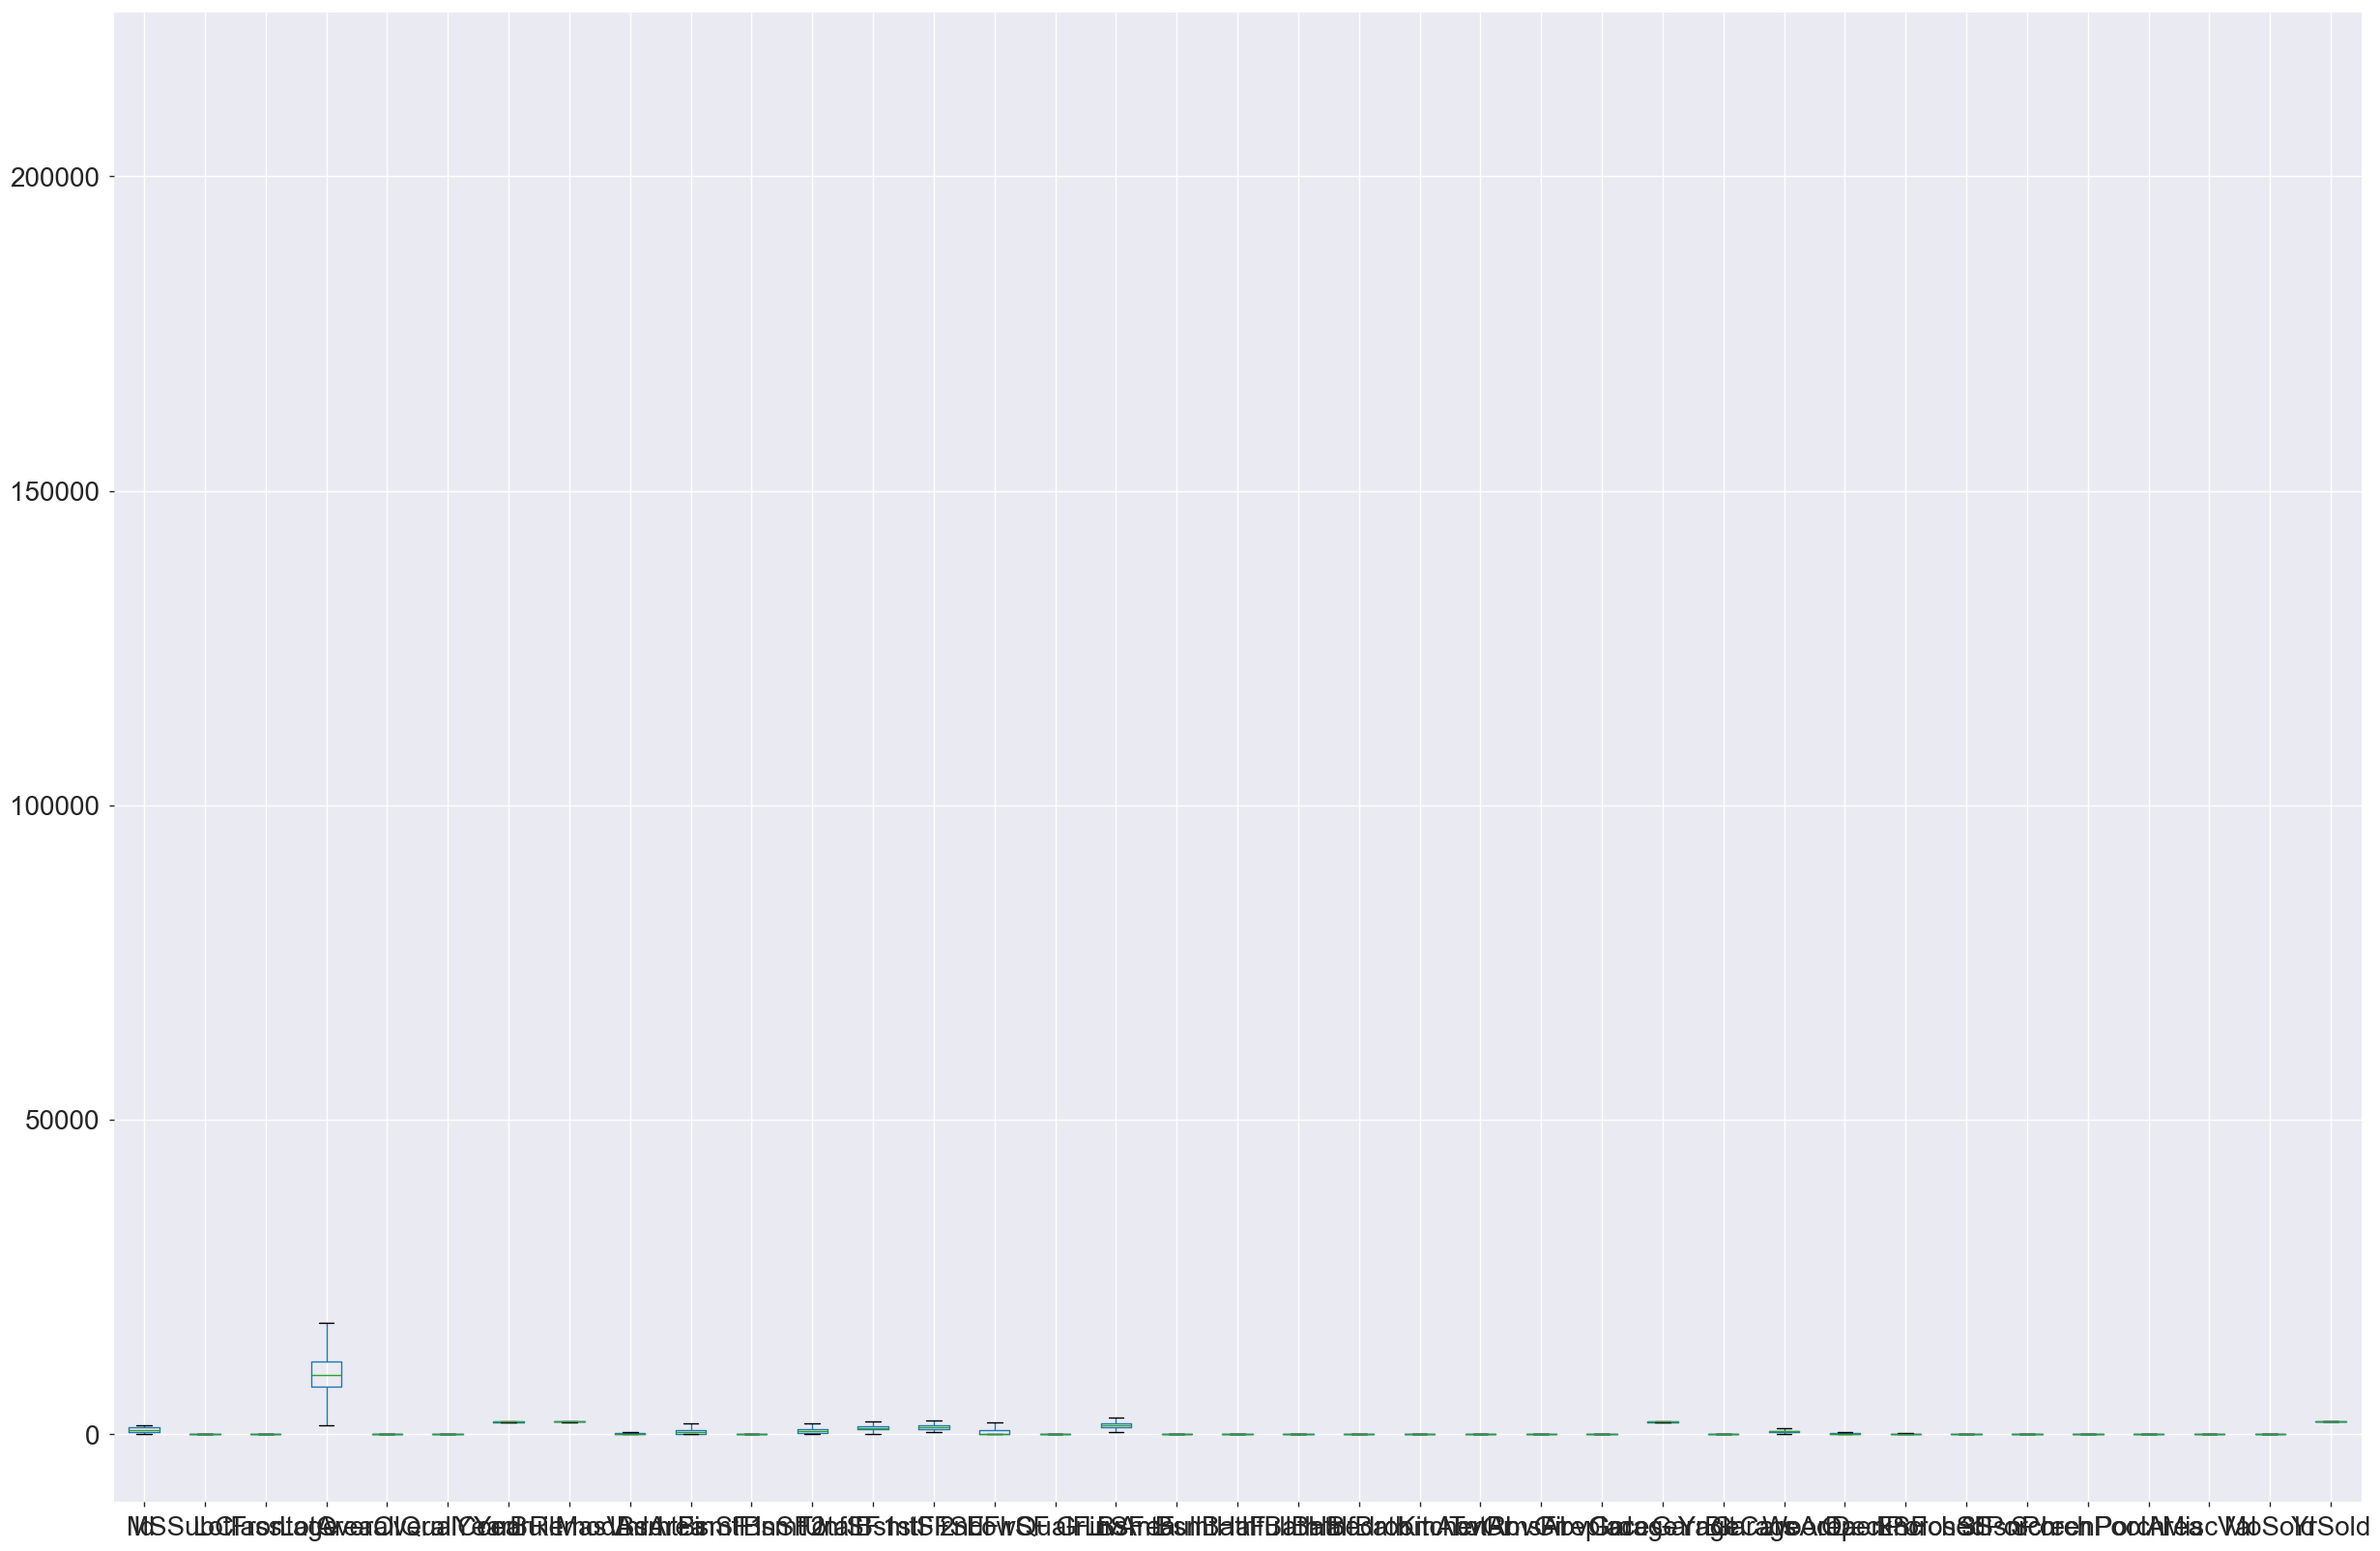

In [542]:
price_trainx_dt.boxplot(figsize=(30,20),fontsize=20)

In [543]:
price_trainx_dt.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond

# Data Preprocessing 

In [544]:
price_trainx_dt=price_trainx_dt.drop(["Id"],axis=1)

In [545]:
price_test_dt=price_test_dt.drop(["Id"],axis=1)

In [546]:
price_trainx_dt["MSSubClass"].isna().sum()

0

In [547]:
price_trainx_dt["MSSubClass"].dtypes

dtype('int64')

In [548]:
price_trainx_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [549]:
price_trainx_dt["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [550]:
price_trainx_dt["GarageCars"].dtypes

dtype('int64')

# Fillna - Used for replacing missing values

In [608]:
price_trainx_dt["LotFrontage"].fillna(price_trainx_dt["LotFrontage"].mean(skipna=True),inplace=True)

In [609]:
price_test_dt["LotFrontage"].fillna(price_trainx_dt["LotFrontage"].mean(skipna=True),inplace=True)

In [610]:
price_trainx_dt["Alley"].fillna("AlleyAccNo",inplace=True)

In [611]:
price_test_dt["Alley"].fillna("AlleyAccNo",inplace=True)

In [612]:
price_trainx_dt["BsmtQual"].fillna("nobase",inplace=True)

In [613]:
price_test_dt["BsmtQual"].fillna("nobase",inplace=True)

In [614]:
price_trainx_dt["FireplaceQu"].fillna("NoFire",inplace=True)

In [615]:
price_test_dt["FireplaceQu"].fillna("NoFire",inplace=True)

In [616]:
price_trainx_dt["BsmtCond"].fillna("Nbs",inplace=True)

In [617]:
price_test_dt["BsmtCond"].fillna("Nbs",inplace=True)

In [618]:
price_trainx_dt["BsmtExposure"].fillna("nbs",inplace=True)

In [619]:
price_test_dt["BsmtExposure"].fillna("nbs",inplace=True)

In [620]:
price_trainx_dt["BsmtFinType1"].fillna("Nbs",inplace=True)

In [621]:
price_test_dt["BsmtFinType1"].fillna("Nbs",inplace=True)

In [622]:
price_trainx_dt["BsmtFinType2"].fillna("nbs",inplace=True)

In [623]:
price_test_dt["BsmtFinType2"].fillna("nbs",inplace=True)

In [624]:
price_trainx_dt["GarageType"].fillna("ng",inplace=True)

In [625]:
price_test_dt["GarageType"].fillna("ng",inplace=True)

In [626]:
price_trainx_dt["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1966.0    21
1962.0    21
1958.0    21
2001.0    20
1996.0    20
1957.0    20
1970.0    20
1960.0    19
1997.0    19
1978.0    19
1954.0    19
1974.0    18
1994.0    18
          ..
1922.0     5
1936.0     5
1916.0     5
1931.0     4
1945.0     4
1935.0     4
1928.0     4
1946.0     4
1982.0     4
1938.0     3
1921.0     3
1924.0     3
1910.0     3
1952.0     3
1932.0     3
2010.0     3
1923.0     3
1937.0     2
1934.0     2
1918.0     2
1947.0     2
1929.0     2
1914.0     2
1915.0     2
1942.0     2
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [627]:
price_trainx_dt["GarageFinish"].fillna("ng",inplace=True)

In [628]:
price_test_dt["GarageFinish"].fillna("ng",inplace=True)

In [629]:
price_trainx_dt["GarageQual"].fillna("ng",inplace=True)

In [630]:
price_test_dt["GarageQual"].fillna("ng",inplace=True)

In [631]:
price_trainx_dt["GarageCond"].fillna("ng",inplace=True)

In [632]:
price_test_dt["GarageCond"].fillna("ng",inplace=True)

In [633]:
price_trainx_dt["PoolQC"].fillna("np",inplace=True)

In [634]:
price_test_dt["PoolQC"].fillna("np",inplace=True)

In [635]:
price_trainx_dt["Fence"].fillna("nf",inplace=True)

In [636]:
price_test_dt["Fence"].fillna("nf",inplace=True)

In [637]:
price_trainx_dt["MiscFeature"].fillna("nmiscf",inplace=True)

In [638]:
price_test_dt["MiscFeature"].fillna("nmiscf",inplace=True)

## to check columns with total missing values all at once in a for loop

In [658]:
for col in price_test_dt.columns:
    if price_test_dt[col].isna().sum()>=1:
        print (col)
   

GarageYrBlt


In [659]:
price_test_dt.isnull().sum().sum()

78

In [653]:
price_trainx_dt["BsmtFullBath"].dtypes

dtype('int64')

In [588]:
price_trainx_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [589]:
price_trainx_dt["Electrical"].mode()[0]

'SBrkr'

In [590]:
price_trainx_dt["Electrical"].fillna(price_trainx_dt["Electrical"].mode()[0],inplace=True)

In [657]:
price_test_dt["SaleType"].fillna(price_trainx_dt["SaleType"].mode()[0],inplace=True)

In [592]:
price_trainx_dt["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [593]:
price_trainx_dt["MasVnrType"].fillna(price_trainx_dt["MasVnrType"].mode()[0],inplace=True)

In [594]:
price_test_dt["MasVnrType"].fillna(price_trainx_dt["MasVnrType"].mode()[0],inplace=True)

In [595]:
price_trainx_dt["SaleType"].dtypes

dtype('O')

In [596]:
price_trainx_dt["MasVnrArea"].fillna(price_trainx_dt["MasVnrArea"].mean(),inplace=True)

In [655]:
price_test_dt["BsmtHalfBath"].fillna(price_trainx_dt["BsmtHalfBath"].mean(),inplace=True)

In [660]:
price_test_dt.isnull().sum().sum()

78

In [661]:
colnames=['MSZoning','Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical',"KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish",'GarageQual', 'GarageCond',
       'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']
for col in colnames:
    price_trainx_dt[col]=price_trainx_dt[col].astype("category")
    price_test_dt[col]=price_test_dt[col].astype("category")

In [600]:
price_test_dt["MSZoning"].fillna(price_test_dt["MSZoning"].mode()[0],inplace=True)

In [601]:
price_test_dt["Utilities"].fillna(price_test_dt["Utilities"].mode()[0],inplace=True)

In [603]:
price_test_dt["Exterior1st"].fillna(price_test_dt["Exterior1st"].mode()[0],inplace=True)

In [604]:
price_test_dt["GarageArea"].fillna(price_test_dt["GarageArea"].mean(),inplace=True)

In [662]:
price_trainx_dt.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
                 ..
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0


In [663]:
price_trainx_dt["TotalAgeofBuilding"]= price_trainx_dt["YrSold"]-price_trainx_dt["YearBuilt"]

In [664]:
price_test_dt["TotalAgeofBuilding"]= price_test_dt["YrSold"]-price_test_dt["YearBuilt"]

In [665]:
price_trainx_dt["AgeofRemodel"]= price_trainx_dt["YrSold"]-price_trainx_dt["YearRemodAdd"]

In [666]:
price_test_dt["AgeofRemodel"]= price_test_dt["YrSold"]-price_test_dt["YearRemodAdd"]

In [667]:
price_trainx_dt["AgeofGarage"]= price_trainx_dt["YrSold"]-price_trainx_dt["GarageYrBlt"]

In [668]:
price_test_dt["AgeofGarage"]= price_test_dt["YrSold"]-price_test_dt["GarageYrBlt"]

In [723]:
price_trainx_dt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,GarageAgeBins,TotalAgeBuildingBins,BuildingRemodelBins
0,60,RL,65.0,8450,Pave,AlleyAccNo,Reg,Lvl,AllPub,Inside,...,0,np,nf,nmiscf,2,WD,Normal,NewGarage,NewBuilding,Newlyremodel
1,20,RL,80.0,9600,Pave,AlleyAccNo,Reg,Lvl,AllPub,FR2,...,0,np,nf,nmiscf,5,WD,Normal,MediumAgeGarage,MediumAgeBuilding,OldremodelBuilding
2,60,RL,68.0,11250,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,0,np,nf,nmiscf,9,WD,Normal,NewGarage,NewBuilding,Newlyremodel
3,70,RL,60.0,9550,Pave,AlleyAccNo,IR1,Lvl,AllPub,Corner,...,0,np,nf,nmiscf,2,WD,Abnorml,NewGarage,VeryOldBuilding,OldremodelBuilding
4,60,RL,84.0,14260,Pave,AlleyAccNo,IR1,Lvl,AllPub,FR2,...,0,np,nf,nmiscf,12,WD,Normal,NewGarage,NewBuilding,Newlyremodel


In [724]:
price_test_dt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,GarageAgeBins,TotalAgeBuildingBins,BuildingRemodelBins
0,20,RH,80.0,11622,Pave,AlleyAccNo,Reg,Lvl,AllPub,Inside,...,0,np,MnPrv,nmiscf,6,WD,Normal,MediumAgeGarage,MediumAgeBuilding,VeryOldremodelBuilding
1,20,RL,81.0,14267,Pave,AlleyAccNo,IR1,Lvl,AllPub,Corner,...,36,np,nf,Gar2,6,WD,Normal,Oldgarage,OldBuilding,VeryOldremodelBuilding
2,60,RL,74.0,13830,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,34,np,MnPrv,nmiscf,3,WD,Normal,NewGarage,NewBuilding,Newlyremodel
3,60,RL,78.0,9978,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,36,np,nf,nmiscf,6,WD,Normal,NewGarage,NewBuilding,Newlyremodel
4,120,RL,43.0,5005,Pave,AlleyAccNo,IR1,HLS,AllPub,Inside,...,82,np,nf,nmiscf,1,WD,Normal,NewGarage,NewBuilding,MediumRemodelBuilding


In [318]:
price_trainx_dt["AgeofGarage"]= price_trainx_dt["YrSold"]-price_trainx_dt["GarageYrBlt"]

In [322]:
price_test_dt["AgeofGarage"]= price_test_dt["YrSold"]-price_test_dt["GarageYrBlt"]

In [683]:
price_trainx_dt.isna().sum()

MSSubClass             0
MSZoning               0
LotFrontage            0
LotArea                0
Street                 0
Alley                  0
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
                      ..
BedroomAbvGr           0
KitchenAbvGr           0
KitchenQual            0
TotRmsAbvGrd           0
Functional             0
Fireplaces             0
FireplaceQu            0
GarageType             0
GarageFinish           0


In [699]:
price_trainx_dt=price_trainx_dt.drop(["TotalAgeofBuilding"],axis=1)

In [700]:
price_test_dt=price_test_dt.drop(["TotalAgeofBuilding"],axis=1)

In [684]:
price_trainx_dt["AgeofGarage"].fillna(0,inplace=True)

In [685]:
price_test_dt["AgeofGarage"].fillna(0,inplace=True)

In [344]:
price_trainx_dt["AgeofGarage"].value_counts()

0.0      165
1.0       87
4.0       45
2.0       35
5.0       34
3.0       34
31.0      31
6.0       31
8.0       30
10.0      27
9.0       27
7.0       26
32.0      25
11.0      25
42.0      24
30.0      23
53.0      22
51.0      22
44.0      22
37.0      22
47.0      21
41.0      20
12.0      20
39.0      20
49.0      20
15.0      20
14.0      19
48.0      18
20.0      17
16.0      17
        ... 
74.0       5
62.0       5
61.0       5
86.0       5
89.0       4
77.0       4
72.0       4
87.0       3
73.0       3
65.0       3
90.0       3
78.0       3
82.0       3
92.0       3
85.0       2
93.0       2
75.0       2
80.0       2
64.0       2
99.0       1
96.0       1
94.0       1
71.0       1
76.0       1
102.0      1
100.0      1
95.0       1
107.0      1
97.0       1
91.0       1
Name: AgeofGarage, Length: 101, dtype: int64

In [386]:
price_test_dt["AgeofGarage"].value_counts()

 0.0      144
 1.0      105
 2.0       47
 5.0       38
 4.0       36
 6.0       35
 11.0      34
 7.0       31
 9.0       28
 32.0      26
 13.0      26
 3.0       26
 30.0      25
 49.0      24
 31.0      22
 29.0      22
 39.0      22
 12.0      21
 50.0      21
 8.0       21
 33.0      20
 42.0      20
 44.0      19
 10.0      18
 41.0      18
 48.0      18
 54.0      18
 55.0      17
 46.0      17
 52.0      17
         ... 
 20.0       4
 24.0       4
 93.0       3
 98.0       3
 64.0       3
 86.0       3
 94.0       3
 84.0       3
 62.0       3
 72.0       3
 96.0       2
 90.0       2
 79.0       2
 73.0       2
 106.0      2
 109.0      1
 113.0      1
 91.0       1
-1.0        1
 75.0       1
 95.0       1
 66.0       1
-200.0      1
 110.0      1
 108.0      1
 74.0       1
 100.0      1
 114.0      1
 92.0       1
 97.0       1
Name: AgeofGarage, Length: 108, dtype: int64

In [ ]:
#price_trainx_dt[if price_trainx_dt["GarageType"]=="ng"]:
   # price_trainx_dt.replace({"AgeofGarage": {0: 999,}})
#price_trainx_dt.drop(df[condition].index, axis=0, inplace=True)

In [686]:
#a = price_trainx_dt.replace(if price_trainx_dt[(price_trainx_dt['GarageType'] == "ng")| price_trainx_dt["AgeofGarage"] ==0 ].index)

In [352]:
#price_trainx_dt['AgeofGarage'] = np.where((price_trainx_dt.GarageType=='ng') & (price_trainx_dt.GarageQual=="ng"), "garagenotbuilt")

In [687]:
price_trainx_dt['AgeofGarage'].loc[(price_trainx_dt['GarageType'] == 'ng') & (price_trainx_dt['GarageQual'] == 'ng')] = -99

In [688]:
price_test_dt['AgeofGarage'].loc[(price_test_dt['GarageType'] == 'ng') & (price_test_dt['GarageQual'] == 'ng')] = -99

In [689]:

price_trainx_dt["AgeofRemodelBins"]=pd.cut(bins=[-99,-1,25,50,75,110],x=price_trainx_dt["AgeofRemodel"],labels=["No Garage","NewGarage","MediumAgeGarage","Oldgarage","VeryOldGarage"],include_lowest=True)

In [690]:
price_test_dt["GarageAgeBins"]=pd.cut(bins=[-99,-1,25,50,75,110],x=price_test_dt["AgeofRemodel"],labels=["No Garage","NewGarage","MediumAgeGarage","Oldgarage","VeryOldGarage"],include_lowest=True)

In [691]:
price_trainx_dt["AgeofGarage"].value_counts()

 1.0      87
 0.0      84
-99.0     81
 4.0      45
 2.0      35
 5.0      34
 3.0      34
 31.0     31
 6.0      31
 8.0      30
 10.0     27
 9.0      27
 7.0      26
 11.0     25
 32.0     25
 42.0     24
 30.0     23
 37.0     22
 44.0     22
 51.0     22
 53.0     22
 47.0     21
 49.0     20
 12.0     20
 15.0     20
 41.0     20
 39.0     20
 14.0     19
 48.0     18
 20.0     17
          ..
 62.0      5
 86.0      5
 74.0      5
 61.0      5
 77.0      4
 89.0      4
 72.0      4
 92.0      3
 78.0      3
 90.0      3
 87.0      3
 82.0      3
 73.0      3
 65.0      3
 64.0      2
 93.0      2
 80.0      2
 85.0      2
 75.0      2
 97.0      1
 107.0     1
 95.0      1
 96.0      1
 71.0      1
 100.0     1
 102.0     1
 76.0      1
 99.0      1
 94.0      1
 91.0      1
Name: AgeofGarage, Length: 102, dtype: int64

In [390]:
price_test_dt["AgeofGarage"].value_counts()

 1.0      105
-99.0      76
 0.0       68
 2.0       47
 5.0       38
 4.0       36
 6.0       35
 11.0      34
 7.0       31
 9.0       28
 13.0      26
 3.0       26
 32.0      26
 30.0      25
 49.0      24
 39.0      22
 29.0      22
 31.0      22
 8.0       21
 12.0      21
 50.0      21
 33.0      20
 42.0      20
 44.0      19
 41.0      18
 48.0      18
 10.0      18
 54.0      18
 55.0      17
 52.0      17
         ... 
 89.0       4
 83.0       4
 93.0       3
 98.0       3
 94.0       3
 86.0       3
 64.0       3
 72.0       3
 62.0       3
 84.0       3
 73.0       2
 106.0      2
 96.0       2
 90.0       2
 79.0       2
 91.0       1
 109.0      1
 113.0      1
 75.0       1
 100.0      1
-1.0        1
 95.0       1
 66.0       1
-200.0      1
 108.0      1
 74.0       1
 92.0       1
 110.0      1
 114.0      1
 97.0       1
Name: AgeofGarage, Length: 109, dtype: int64

In [380]:
price_trainx_dt.loc[:,["AgeofGarage","GarageAgeBins"]]

,AgeofGarage,GarageAgeBins
0,5,NewGarage
1,31,MediumAgeGarage
2,7,NewGarage
3,8,NewGarage
4,8,NewGarage
5,16,NewGarage
6,3,NewGarage
7,36,MediumAgeGarage
8,77,VeryOldGarage
9,69,Oldgarage


In [694]:
price_trainx_dt=price_trainx_dt.drop(["AgeofGarage"],axis=1)

KeyError: "labels ['AgeofGarage'] not contained in axis"

In [695]:
price_test_dt=price_test_dt.drop(["AgeofGarage"],axis=1)

KeyError: "labels ['AgeofGarage'] not contained in axis"

In [726]:
price_test_dt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,GarageAgeBins,TotalAgeBuildingBins,BuildingRemodelBins
0,20,RH,80.0,11622,Pave,AlleyAccNo,Reg,Lvl,AllPub,Inside,...,0,np,MnPrv,nmiscf,6,WD,Normal,MediumAgeGarage,MediumAgeBuilding,VeryOldremodelBuilding
1,20,RL,81.0,14267,Pave,AlleyAccNo,IR1,Lvl,AllPub,Corner,...,36,np,nf,Gar2,6,WD,Normal,Oldgarage,OldBuilding,VeryOldremodelBuilding
2,60,RL,74.0,13830,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,34,np,MnPrv,nmiscf,3,WD,Normal,NewGarage,NewBuilding,Newlyremodel
3,60,RL,78.0,9978,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,36,np,nf,nmiscf,6,WD,Normal,NewGarage,NewBuilding,Newlyremodel
4,120,RL,43.0,5005,Pave,AlleyAccNo,IR1,HLS,AllPub,Inside,...,82,np,nf,nmiscf,1,WD,Normal,NewGarage,NewBuilding,MediumRemodelBuilding


In [395]:
price_trainx_dt["TotalAgeofBuilding"]

0        5
1       31
2        7
3       91
4        8
5       16
6        3
7       36
8       77
9       69
10      43
11       1
12      46
13       1
14      48
15      78
16      40
17      39
18       4
19      51
20       1
21      77
22       6
23      31
24      42
25       2
26      59
27       3
28      49
29      81
        ..
1430     1
1431    33
1432    80
1433     8
1434    29
1435    46
1436    36
1437     0
1438    53
1439    28
1440    86
1441     4
1442     1
1443    93
1444     3
1445    41
1446    48
1447    12
1448    97
1449    36
1450    35
1451     1
1452     1
1453     0
1454     5
1455     8
1456    32
1457    69
1458    60
1459    43
Name: TotalAgeofBuilding, Length: 1460, dtype: int64

In [696]:
price_trainx_dt["AgeofRemodelBins"]=pd.cut(bins=[0,25,50,75,110],x=price_trainx_dt["TotalAgeofBuilding"],labels=["NewBuilding","MediumAgeBuilding","OldBuilding","VeryOldBuilding"],include_lowest=True)

In [697]:
price_test_dt["AgeofRemodelBins"]=pd.cut(bins=[0,25,50,75,110],x=price_test_dt["TotalAgeofBuilding"],labels=["NewBuilding","MediumAgeBuilding","OldBuilding","VeryOldBuilding"],include_lowest=True)

In [476]:
price_test_dt=price_test_dt.drop(["TotalAgeofBuilding"],axis=1)

In [405]:
price_trainx_dt["AgeofRemodel"].value_counts()

 0     124
 1      87
 4      63
 3      53
 56     52
 2      52
 5      46
 57     43
 8      42
 6      40
 59     39
 7      38
 9      38
 10     38
 58     37
 11     29
 12     28
 13     28
 31     28
 14     27
 39     24
 36     22
 15     21
 16     21
 37     20
 32     19
 60     19
 30     17
 44     17
 53     16
      ... 
 34     15
 29     15
 51     14
 48     14
 33     13
 45     13
 40     13
 38     13
 18     12
 41     12
 46     11
 49     11
 19     11
 17     10
 43     10
 52     10
 21     10
 35      9
 28      9
 50      9
 54      9
 20      9
 27      8
 22      8
 26      7
 25      7
 24      6
 23      6
 55      5
-1       1
Name: AgeofRemodel, Length: 62, dtype: int64

In [406]:
max(price_trainx_dt["AgeofRemodel"])

60

In [702]:
price_trainx_dt["BuildingRemodelBins"]=pd.cut(bins=[0,15,30,45,60],x=price_trainx_dt["AgeofRemodel"],labels=["Newlyremodel","MediumRemodelBuilding","OldremodelBuilding","VeryOldremodelBuilding"],include_lowest=True)

In [703]:
price_test_dt["BuildingRemodelBins"]=pd.cut(bins=[0,15,30,45,60],x=price_test_dt["AgeofRemodel"],labels=["Newlyremodel","MediumRemodelBuilding","OldremodelBuilding","VeryOldremodelBuilding"],include_lowest=True)

In [704]:
price_trainx_dt=price_trainx_dt.drop(["AgeofRemodel"],axis=1)

In [705]:
price_test_dt=price_test_dt.drop(["AgeofRemodel"],axis=1)

In [434]:
price_trainx_dt["MiscVal"].value_counts()

KeyError: 'MiscVal'

In [725]:
price_trainx_dt=price_trainx_dt.drop(["ScreenPorch"],axis=1)

In [722]:
price_test_dt=price_test_dt.drop(["ScreenPorch"],axis=1)

In [707]:
price_trainx_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

In [706]:
pp.ProfileReport(price_trainx_dt)

Number of variables,78
Number of observations,1460
Total Missing (%),0.0%
Total size in memory,437.4 KiB
Average record size in memory,306.8 B
Numeric,32
Categorical,46
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [443]:
price_trainx_dt["TotalAgeBuildingBins"].isna().sum()

0

In [442]:
price_trainx_dt["TotalAgeBuildingBins"].fillna(price_trainx_dt["TotalAgeBuildingBins"].mode()[0],inplace=True)

In [479]:
price_trainx_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'SaleTy

In [480]:
price_test_dt.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType',
       'SaleCon

In [491]:
lis=['MSZoning','Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical',"KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish",'GarageQual', 'GarageCond',
       'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition']

In [492]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()
for i in lis:
    le.fit(price_trainx_dt[i])
    price_trainx_dt[i] = le.fit_transform(price_trainx_dt[i])

TypeError: '<' not supported between instances of 'str' and 'float'

In [493]:
price_trainx_dt["LotFrontage"].value_counts()

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
75.000000      53
65.000000      44
85.000000      40
78.000000      25
90.000000      23
21.000000      23
68.000000      19
24.000000      19
64.000000      19
73.000000      18
79.000000      17
63.000000      17
55.000000      17
72.000000      17
100.000000     16
51.000000      15
74.000000      15
66.000000      15
52.000000      14
59.000000      13
43.000000      12
71.000000      12
82.000000      12
57.000000      12
40.000000      12
             ... 
101.000000      2
109.000000      2
116.000000      2
134.000000      2
122.000000      2
313.000000      2
97.000000       2
124.000000      2
174.000000      2
121.000000      2
150.000000      1
111.000000      1
182.000000      1
149.000000      1
112.000000      1
33.000000       1
153.000000      1
141.000000      1
46.000000       1
152.000000      1
160.000000      1
168.000000      1
128.000000      1
144.000000      1
39.000000 

In [494]:
le=preprocessing.LabelEncoder
le.fit(price_trainx_dt["BuildingRemodelBins"])
price_trainx_dt["BuildingRemodelBins"] = le.fit_transform(price_trainx_dt["BuildingRemodelBins"])

TypeError: fit() missing 1 required positional argument: 'y'

In [501]:
price_trainx_dt = pd.get_dummies(price_trainx_dt,columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition',],drop_first=True)


KeyError: "['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'\n 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'\n 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'\n 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'\n 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'\n 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'\n 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'\n 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'\n 'SaleCondition'] not in index"

In [727]:
price_trainx_dt.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition,GarageAgeBins,TotalAgeBuildingBins,BuildingRemodelBins
0,60,RL,65.0,8450,Pave,AlleyAccNo,Reg,Lvl,AllPub,Inside,...,61,np,nf,nmiscf,2,WD,Normal,NewGarage,NewBuilding,Newlyremodel
1,20,RL,80.0,9600,Pave,AlleyAccNo,Reg,Lvl,AllPub,FR2,...,0,np,nf,nmiscf,5,WD,Normal,MediumAgeGarage,MediumAgeBuilding,OldremodelBuilding
2,60,RL,68.0,11250,Pave,AlleyAccNo,IR1,Lvl,AllPub,Inside,...,42,np,nf,nmiscf,9,WD,Normal,NewGarage,NewBuilding,Newlyremodel
3,70,RL,60.0,9550,Pave,AlleyAccNo,IR1,Lvl,AllPub,Corner,...,35,np,nf,nmiscf,2,WD,Abnorml,NewGarage,VeryOldBuilding,OldremodelBuilding
4,60,RL,84.0,14260,Pave,AlleyAccNo,IR1,Lvl,AllPub,FR2,...,84,np,nf,nmiscf,12,WD,Normal,NewGarage,NewBuilding,Newlyremodel


In [731]:
price_trainx_dt = pd.get_dummies(price_trainx_dt,columns=['MSZoning','Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical',"KitchenQual","Functional","FireplaceQu","GarageType","GarageFinish",'GarageQual', 'GarageCond',
       'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType', 'SaleCondition',"GarageAgeBins","TotalAgeBuildingBins","BuildingRemodelBins"],drop_first=True)

In [740]:
price_trainx_dt.shape

(1460, 257)

In [750]:
price_test_dt.shape

(1459, 257)

In [749]:
ptrc=price_trainx_dt.columns


In [734]:
ptec=price_test_dt.columns

In [735]:
ptrc-ptec

TypeError: cannot perform __sub__ with this index type: Index

In [736]:
colnamesmissing = list(set(ptrc)-set(ptec))

In [738]:
colnamesmissing

['RoofMatl_Membran',
 'Condition2_RRAn',
 'Condition2_RRAe',
 'GarageQual_Fa',
 'MiscFeature_TenC',
 'Electrical_Mix',
 'Utilities_NoSeWa',
 'Heating_OthW',
 'Condition2_RRNn',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'RoofMatl_CompShg',
 'Heating_GasA',
 'PoolQC_Fa',
 'HouseStyle_2.5Fin',
 'RoofMatl_Roll',
 'RoofMatl_Metal',
 'Exterior1st_Stone']

In [739]:
for i in colnamesmissing:
    price_test_dt[i]=0

In [742]:
export_price_trainx_dt_csv = price_trainx_dt.to_csv (r'C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Desktop\kaggle competition\house-prices-adv.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path


In [746]:
price_trainx_dt.to_csv("trainx.csv",header=True)

In [748]:
price_test_dt.to_csv("testx.csv",header=True)

In [751]:
len(price_test_dt.columns)

257

In [752]:
len(price_trainx_dt.columns)

257

In [753]:
price_test_dt.sample()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Condition2_RRNn,Exterior2nd_Other,Exterior1st_ImStucc,RoofMatl_CompShg,Heating_GasA,PoolQC_Fa,HouseStyle_2.5Fin,RoofMatl_Roll,RoofMatl_Metal,Exterior1st_Stone
485,20,70.049958,31220,6,2,0.0,0.0,1632.0,1632.0,1474,...,0,0,0,0,0,0,0,0,0,0


In [754]:
price_trainx_dt.sample()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageAgeBins_NewGarage,GarageAgeBins_MediumAgeGarage,GarageAgeBins_Oldgarage,GarageAgeBins_VeryOldGarage,TotalAgeBuildingBins_MediumAgeBuilding,TotalAgeBuildingBins_OldBuilding,TotalAgeBuildingBins_VeryOldBuilding,BuildingRemodelBins_MediumRemodelBuilding,BuildingRemodelBins_OldremodelBuilding,BuildingRemodelBins_VeryOldremodelBuilding
549,60,75.0,9375,7,5,0.0,0,912,912,912,...,1,0,0,0,0,0,0,0,0,0


In [755]:
price_test_dt = price_test_dt[price_trainx_dt.columns]

In [756]:
X_train, X_test, y_train, y_test = train_test_split(price_trainx_dt, y, test_size=0.20)

In [757]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 257)
(292, 257)
(1168,)
(292,)


In [758]:
price_trainx_dt.dtypes

MSSubClass                                      int64
LotFrontage                                   float64
LotArea                                         int64
OverallQual                                     int64
OverallCond                                     int64
MasVnrArea                                    float64
BsmtFinSF1                                      int64
BsmtUnfSF                                       int64
TotalBsmtSF                                     int64
1stFlrSF                                        int64
2ndFlrSF                                        int64
GrLivArea                                       int64
BsmtFullBath                                    int64
FullBath                                        int64
HalfBath                                        int64
BedroomAbvGr                                    int64
KitchenAbvGr                                    int64
TotRmsAbvGrd                                    int64
Fireplaces                  

In [759]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



In [760]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [761]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [762]:
fit1 = lr.fit(X_train,y_train)
fit2 = dtr.fit(X_train,y_train)
fit3 = rfr.fit(X_train,y_train)
fit4 = gbr.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [765]:
pre_lr = lr.predict(X_test)
pre_dtr = dtr.predict(X_test)
pre_rfr = rfr.predict(X_test)
pre_gbr = gbr.predict(X_test)

In [818]:
mean_squared_log_error(y_test,pre_lr)

0.37700060824125936

In [819]:
mean_squared_log_error(y_test,pre_dtr)

0.3190668252221122

In [769]:
mean_squared_log_error(y_test,pre_rfr)

826132067.0167465

In [820]:
mean_squared_log_error(y_test,pre_gbr)

0.3112544338824126

In [773]:
X_train

array([[-0.15924848, -0.82085036, -0.40182571, ..., -0.35542361,
        -0.44214977,  1.96124273],
       [ 0.55477158,  0.43560455, -0.09041994, ..., -0.35542361,
        -0.44214977, -0.50988079],
       [ 2.45882506, -2.07730527, -0.76624461, ..., -0.35542361,
         2.26167709, -0.50988079],
       ...,
       [-0.87326854, -0.01088755, -0.14806708, ..., -0.35542361,
         2.26167709, -0.50988079],
       [-0.87326854,  0.43560455, -0.18810496, ..., -0.35542361,
        -0.44214977, -0.50988079],
       [-0.15924848, -0.91059714, -0.14602811, ..., -0.35542361,
        -0.44214977,  1.96124273]])

In [784]:
price_trainx_dt.dtypes

MSSubClass                                      int64
LotFrontage                                   float64
LotArea                                         int64
OverallQual                                     int64
OverallCond                                     int64
MasVnrArea                                    float64
BsmtFinSF1                                      int64
BsmtUnfSF                                       int64
TotalBsmtSF                                     int64
1stFlrSF                                        int64
2ndFlrSF                                        int64
GrLivArea                                       int64
BsmtFullBath                                    int64
FullBath                                        int64
HalfBath                                        int64
BedroomAbvGr                                    int64
KitchenAbvGr                                    int64
TotRmsAbvGrd                                    int64
Fireplaces                  

In [793]:
trainint = price_trainx_dt.select_dtypes(include='int64')

In [786]:
trainint

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
0,60,8450,7,5,706,150,856,856,854,1710,...,1,3,1,8,0,2,548,0,61,2
1,20,9600,6,8,978,284,1262,1262,0,1262,...,0,3,1,6,1,2,460,298,0,5
2,60,11250,7,5,486,434,920,920,866,1786,...,1,3,1,6,1,2,608,0,42,9
3,70,9550,7,5,216,540,756,961,756,1717,...,0,3,1,7,1,3,642,0,35,2
4,60,14260,8,5,655,490,1145,1145,1053,2198,...,1,4,1,9,1,3,836,192,84,12
5,50,14115,5,5,732,64,796,796,566,1362,...,1,1,1,5,0,2,480,40,30,10
6,20,10084,8,5,1369,317,1686,1694,0,1694,...,0,3,1,7,1,2,636,255,57,8
7,60,10382,7,6,859,216,1107,1107,983,2090,...,1,3,1,7,2,2,484,235,204,11
8,50,6120,7,5,0,952,952,1022,752,1774,...,0,2,2,8,2,2,468,90,0,4
9,190,7420,5,6,851,140,991,1077,0,1077,...,0,2,2,5,2,1,205,0,4,1


In [794]:
testint = price_test_dt.select_dtypes(include='int64')

In [795]:
X_train, X_test, y_train, y_test = train_test_split(trainint, y, test_size=0.20)

In [796]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 22)
(292, 22)
(1168,)
(292,)


In [806]:
lr1 = LinearRegression()
dtr1 = DecisionTreeRegressor()
rfr1 = RandomForestRegressor()
gbr1 = GradientBoostingRegressor()

In [798]:
fit_lr1 = lr1.fit(X_train,y_train)
fit_dtr1 = dtr1.fit(X_train,y_train)
fit_rfr1 = rfr1.fit(X_train,y_train)
fit_gbr1 = gbr1.fit(X_train,y_train)

C:\Users\Dr. Jhansi Rani.SSV_BALARAM_MOH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [799]:
pre_lr1 = lr1.predict(X_test)
pre_dtr1 = dtr1.predict(X_test)
pre_rfr1 = rfr1.predict(X_test)
pre_gbr1 = gbr1.predict(X_test)

In [800]:
mean_squared_error(y_test,pre_lr1)

848648295.8367754

In [802]:
mean_squared_error(y_test,pre_dtr1)

1398815334.1575344

In [804]:
mean_squared_error(y_test,pre_rfr1)

692009475.6890411

In [805]:
mean_squared_error(y_test,pre_gbr1)

566996598.1944946

In [809]:
X_train.sample()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
483,120,4500,6,5,897,319,1216,1216,0,1216,...,0,2,1,5,0,2,402,0,125,5


In [810]:
X_test.sample()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold
1029,160,1680,6,7,317,355,672,672,546,1218,...,1,3,1,7,0,1,264,0,28,5


In [812]:
y_test[1029]

118000

In [813]:
y_train[483]

164000

In [814]:
from sklearn.metrics import mean_squared_log_error

In [815]:
mean_squared_log_error(y_test,pre_gbr1)

0.018399586677486625

In [816]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [817]:
mean_absolute_percentage_error(y_test,pre_gbr1)

9.791422103593247